# Laboratorio 1 Fundamentos de Aprendizaje Profundo

Nombre: Antonina Arriagada

### 1. Definiciones e importación librerias

In [1]:
import torch.nn as nn
import torch
import time
import sys
import pandas as pd

#### 1.1 Definición de la red

In [2]:
class SimpleFFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size=1):
        super(SimpleFFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        h1 = torch.relu(self.fc1(x))
        h2 = torch.relu(self.fc2(h1))
        return torch.sigmoid(self.fc3(h2))
    
    def num_parameters(self):
        total = 0
        for p in self.parameters():
            total += p.numel()
        return total

#### 1.2 Definición de dataset y preprocesamiento de datos

RandomDataset

In [16]:
from torch.utils.data import Dataset, DataLoader

class RandomDataSet(Dataset):
  def __init__(self, N, f):
    R_N_f = torch.rand(N,f)
    self.X = torch.bernoulli(R_N_f)
    R_N_1 = torch.rand(N,1)
    self.Y = torch.bernoulli(R_N_1)
    self.num_features = f

  def __len__(self):
    return self.X.size()[0]

  def __getitem__(self, i):
    X_normalized = X * 2 - 1
    Y_normalized = Y * 2 - 1 
    return self.X[i], self.Y[i]

Dataset de clasificación binaria

In [4]:
weather_data = pd.read_csv("dataset/weather.csv")
weather_data.describe()


,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,25000.000000,24669.000000,24824.000000,24721.000000,9432.000000,6664.000000,21545.000000,24428.000000,23770.000000,24609.000000,23936.000000,20172.000000,20173.000000,14136.000000,13815.000000,24755.000000,24082.000000,25000.000000
mean,12499.500000,13.294568,23.990558,2.674467,5.825138,7.811945,37.772755,12.686917,16.837106,69.822951,52.762826,1018.173290,1015.627438,4.251556,4.409265,17.953084,22.507171,2.677376
std,7217.022701,5.848304,6.114348,9.720306,4.871567,3.718698,13.212331,9.136115,9.095719,17.755908,21.210121,6.481112,6.394829,2.968785,2.719235,5.394685,5.954540,9.705604
min,0.000000,-3.300000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,0.000000
25%,6249.750000,8.900000,19.500000,0.000000,3.000000,5.500000,28.000000,6.000000,9.000000,58.000000,37.000000,1013.800000,1011.300000,1.000000,2.000000,14.200000,18.100000,0.000000
50%,12499.500000,14.000000,23.400000,0.000000,4.800000,8.900000,35.000000,11.000000,17.000000,71.000000,54.000000,1018.200000,1015.700000,5.000000,5.000000,18.400000,21.900000,0.000000
75%,18749.250000,17.900000,27.700000,0.600000,7.200000,10.600000,46.000000,19.000000,22.000000,83.000000,68.000000,1022.600000,1020.000000,7.000000,7.000000,21.900000,26.100000,0.800000
max,24999.000000,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,46.700000,371.000000


In [5]:
print(weather_data.columns)


Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

weather_data.drop(columns=['Unnamed: 0', 'Date'], inplace=True)

numeric_columns = weather_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = weather_data.select_dtypes(include=['object']).columns

# Se llenan espacios vacíos
weather_data[numeric_columns] = weather_data[numeric_columns].fillna(weather_data[numeric_columns].median())

# se conviertes las variables categóricas en columnas binarias
weather_data = weather_data.apply(lambda x: x.fillna(x.mode()[0]) if x.name in categorical_columns else x)
weather_data = pd.get_dummies(weather_data, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'])

Los datos numéricos se están escalando y normalizando utilizando el método StandardScaler de sklearn, que ajusta cada característica numérica a fin de  tener una media de 0 y una desviación estándar de 1.

In [7]:
scaler = StandardScaler() 
weather_data[numeric_columns] = scaler.fit_transform(weather_data[numeric_columns])

MNIST

In [ ]:
from torchvision import datasets, transforms

#  normalización de las imágenes en escala de grises, centrándolas en un valor medio de 0 y escalándolas para que los valores estén entre -1 y 1.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./dataset', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./dataset', train=False, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5631380.57it/s] 


Extracting ./dataset\MNIST\raw\train-images-idx3-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 212120.94it/s]


Extracting ./dataset\MNIST\raw\train-labels-idx1-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2220783.73it/s]


Extracting ./dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to ./dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4323769.58it/s]

Extracting ./dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./dataset\MNIST\raw



In [12]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [13]:
images, labels = next(iter(train_loader))
print(f'Batch images shape: {images.shape}, Batch labels shape: {labels.shape}')

Batch images shape: torch.Size([64, 1, 28, 28]), Batch labels shape: torch.Size([64])


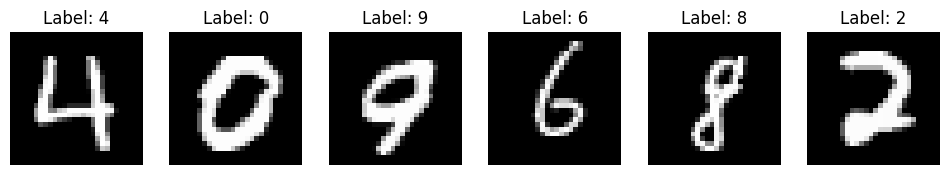

In [15]:
import matplotlib.pyplot as plt

images = images * 0.5 + 0.5 

fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray') 
    axes[i].set_title(f'Label: {labels[i].item()}')
    axes[i].axis('off')
plt.show()

### 2. Inicialización de pesos

Inicialización de Xavier (o Glorot): Ideal para redes con funciones de 
activación simétricas como tanh o sigmoid, y mejora la propagación de 
los gradientes en redes profundas.

Inicialización de He: Recomendada para redes con funciones de 
activación como ReLU, ya que ayuda a manejar el problema del 
desvanecimiento de gradientes.

El estudiante debe documentar las observaciones sobre cómo la inicialización 
de los pesos y la normalización de los datos afectan la estabilidad del 
entrenamiento, la rapidez de la convergencia y el rendimiento final del modelo.

Sugerencia de análisis: Comparar los resultados obtenidos con cada 
optimizador e inicialización utilizando métricas como la pérdida de 
entrenamiento y precisión, además de visualizar las curvas de aprendizaje 
para cada configuración.

#### 2.1 Inicialización de Xavier

La inicialización de Xavier (también conocida como Glorot) se usa típicamente con activaciones sigmoides o tangentes hiperbólicas (tanh). La función de Xavier ajusta los pesos para que sigan una distribución uniforme o normal con una varianza específica que ayuda a estabilizar la activación en cada capa.

In [ ]:
def init_xavier(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight) 
            if layer.bias is not None:
                nn.init.zeros_(layer.bias) 

#### 2.2 Inicialización de He

La inicialización de He es ideal cuando se utilizan activaciones ReLU o variantes de ReLU, ya que adapta la varianza de los pesos a la cantidad de neuronas en la capa anterior, ayudando a que las activaciones no se saturen ni se apaguen.

In [17]:
def init_he(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu') 
            if layer.bias is not None:
                nn.init.zeros_(layer.bias)

### 3. Optimización

Algoritmos de optimización

##### 3.1 SGD (Descenso de Gradiente Estocástico)

In [ ]:
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=0.01)

##### 3.2 SGD con Momentum

In [ ]:
optimizer_sgd_momentum = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

##### 3.3 SGD con Nesterov Momentum

In [ ]:
optimizer_sgd_mnesterov = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

##### 3.4 RMSProp

In [ ]:
optimizer_rsm = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

##### 3.5 Adam

In [ ]:
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999))

### 4. Regularización

##### 4.1 Dropout

Dropout ayuda a reducir el sobreajuste apagando aleatoriamente ciertas unidades durante el entrenamiento. Puedes definir una función que añada capas de dropout a un modelo

In [ ]:
def apply_dropout(model, p=0.5):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            model.add_module("dropout_" + str(id(layer)), nn.Dropout(p=p))

##### 4.2 Batch Normalization

Batch Normalization se puede aplicar a las capas de manera similar. Esto ayuda a estabilizar el entrenamiento al mantener las activaciones de cada capa en un rango adecuado.

In [ ]:
def apply_batch_norm(model):
    new_layers = []
    for layer in model.children():
        new_layers.append(layer)
        if isinstance(layer, nn.Linear):
            new_layers.append(nn.BatchNorm1d(layer.out_features))  # BatchNorm1d para datos en batch
    return nn.Sequential(*new_layers)

##### 4.3 Regularización L2

La regularización L2 (también llamada decaimiento de peso) se puede agregar directamente en el optimizador, y su valor será aplicado a cada parámetro del modelo.

In [ ]:
def l2_regularization(model, lambda_l2):
    l2_norm = sum(param.pow(2.0).sum() for param in model.parameters())
    return lambda_l2 * l2_norm